In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from scipy.stats import iqr
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

df=pd.read_csv('C:/Users/LENOVO/Desktop/oasis/L1_P2_customer_segmentation.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

# Content Attributes

# Exploratory Data Analysis


In [64]:
df["TotalAmountSpent"] = df["MntFishProducts"] + df["MntFruits"] + df["MntGoldProds"] + df["MntSweetProducts"] + df["MntMeatProducts"] + df["MntWines"]

# Year birth

In [65]:
from datetime import datetime
df["Age"].describe()

count    2205.000000
mean       51.095692
std        11.705801
min        24.000000
25%        43.000000
50%        50.000000
75%        61.000000
max        80.000000
Name: Age, dtype: float64

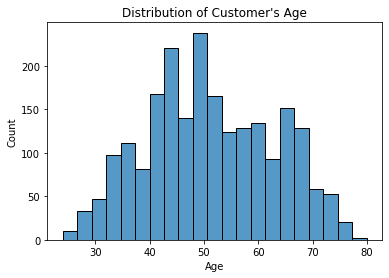

In [66]:
sns.histplot(data=df, x="Age")
plt.title("Distribution of Customer's Age")
plt.savefig("Age.png");

It is seen that most of our customer's age distribution is within the range 41-60.

education_2n Cycle 
education_Basic  
education_Graduation 
education_Master 
education_PhD

# Education

In [67]:
df['Education'] = '' 

df.loc[df['education_2n Cycle'] == 1, 'Education'] = '2n Cycle'
df.loc[df['education_Basic'] == 1, 'Education'] = 'Basic'
df.loc[df['education_Graduation'] == 1, 'Education'] = 'Graduation'
df.loc[df['education_Master'] == 1, 'Education'] = 'Master'
df.loc[df['education_PhD'] == 1, 'Education'] = 'PhD'

df = df.drop(['education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD'], axis=1)


In [68]:
df["Education"].value_counts()

Graduation    1113
PhD            476
Master         364
2n Cycle       198
Basic           54
Name: Education, dtype: int64

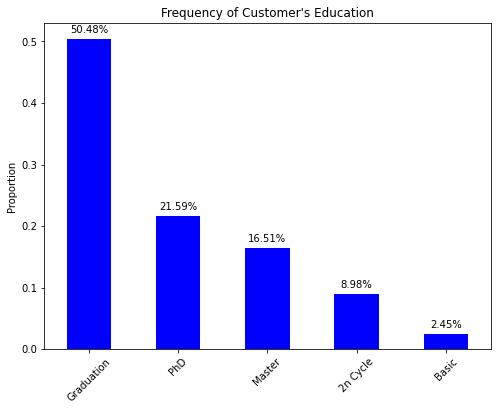

In [69]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
df["Education"].value_counts(normalize=True).plot.bar(color='blue')
plt.xticks(rotation=45)
plt.title("Frequency of Customer's Education")
plt.ylabel('Proportion')

totals = df["Education"].value_counts(normalize=True)
for i in range(len(totals)):
    plt.text(i, totals[i] + 0.01, '{:.2f}%'.format(totals[i]*100), ha='center')

plt.show()

It is seen from the above summary that half of our customer's highest education level is first degree graduation.

# Marital status

In [70]:
df['Marital_status'] = '' 
df.loc[df['marital_Divorced'] == 1, 'Marital_status'] = 'Divorced'
df.loc[df['marital_Married'] == 1, 'Marital_status'] = 'Married'
df.loc[df['marital_Single'] == 1, 'Marital_status'] = 'Single'
df.loc[df['marital_Together'] == 1, 'Marital_status'] = 'Together'
df.loc[df['marital_Widow'] == 1, 'Marital_status'] = 'Widow'

df = df.drop(['marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow'], axis=1)


In [71]:
df["Marital_status"].value_counts()


Married     854
Together    568
Single      477
Divorced    230
Widow        76
Name: Marital_status, dtype: int64

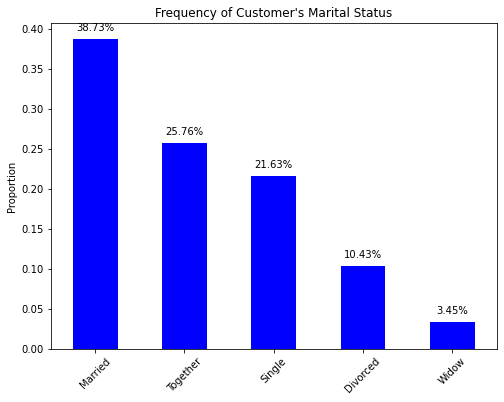

In [72]:

plt.figure(figsize=(8, 6))
df["Marital_status"].value_counts(normalize=True).plot.bar(color='blue')
plt.xticks(rotation=45)
plt.title("Frequency of Customer's Marital Status")
plt.ylabel('Proportion')

totals = df["Marital_status"].value_counts(normalize=True)
for i in range(len(totals)):
    plt.text(i, totals[i] + 0.01, '{:.2f}%'.format(totals[i]*100), ha='center')

plt.show()


It is seen from the above summary that close to highest proportion (39%) of customers are married while the lowest (3%) of customers are widow



# Income

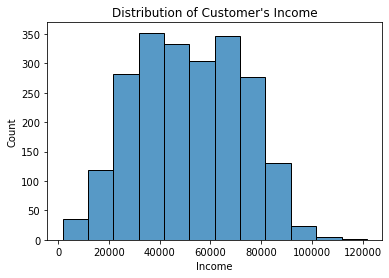

In [73]:
sns.histplot(data=df, x="Income", binwidth=1e4)
plt.title("Distribution of Customer's Income");

It is seen that majority of customer's income is within 0-100k$. 

# Total Children

In [74]:
df["Total_Children"] = df["Kidhome"] + df["Teenhome"]
df["Total_Children"].value_counts()


1    1112
0     628
2     415
3      50
Name: Total_Children, dtype: int64

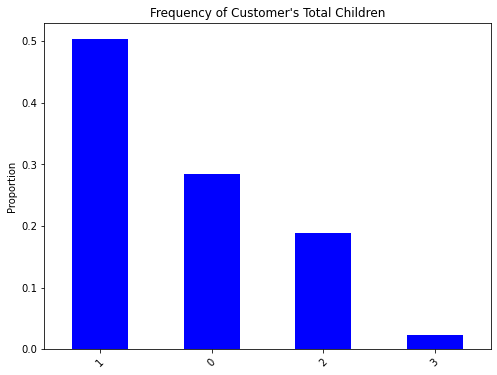

In [75]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
df["Total_Children"].value_counts(normalize=True).plot.bar(color='blue')
plt.xticks(rotation=45)
plt.title("Frequency of Customer's Total Children")
plt.ylabel('Proportion')


plt.show()

Above half of customer's have only one kid and teen at home.



# Total amount spent



In [76]:
df["MntTotal"].describe()

count    2205.000000
mean      562.764626
std       575.936911
min         4.000000
25%        56.000000
50%       343.000000
75%       964.000000
max      2491.000000
Name: MntTotal, dtype: float64

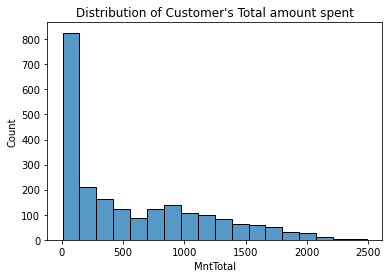

In [77]:
sns.histplot(data=df, x="MntTotal")
plt.title("Distribution of Customer's Total amount spent");

It can be seen from the above summary that close to half of customers total amount spent on the companies product is with 0 to 200.



# Conclusion of EDA

Firstly from the EDA we saw that Income was really the key indicator that was determined the amount a customer will spend.

Also In terms of Education we noticed customers with graduate education level and above tends to spend 12 times higher than those customers with undergraduate education level. The reason for this is because customers with graduate education level and above earns above 2 times than customers with undergradute education level.

Also we noticed a trends in terms of total children and total amount spent. We saw that on average there was a decline on the amount spent as the total number of children increases.I.e, as children increases so do the amount spent on average reduces.

# Building the KMeans Model


In [95]:
data = df[["Income", "MntTotal","Age"]]
df_log = np.log(data)


In [96]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
std_scaler = StandardScaler()
df_scaled = std_scaler.fit_transform(df_log)
errors = []
for k in range(1, 11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df_scaled)
    errors.append(model.inertia_)

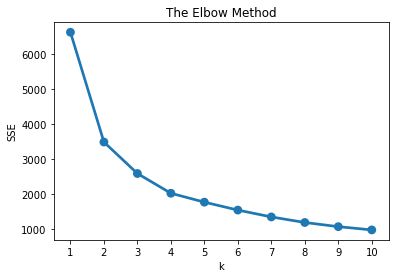

In [97]:
plt.title('The Elbow Method')
plt.xlabel('k'); plt.ylabel('SSE')
sns.pointplot(x=list(range(1, 11)), y=errors)
plt.savefig("Elbow.png")


In [98]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [99]:
from kneed import KneeLocator
kl = KneeLocator(x = range(1, 11),
                 y = errors,
                 curve="convex",
                 direction="decreasing")
print('The optimum number of clusters is: ' + str(kl.elbow))

The optimum number of clusters is: 3


In [100]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(df_scaled)


KMeans(n_clusters=3, random_state=42)

In [102]:
data = data.assign(ClusterLabel= model.labels_)
data.groupby("ClusterLabel")[["Income", "MntTotal", "Age"]].mean()

,Income,MntTotal,Age
ClusterLabel,,,
0,30835.925837,59.593301,46.800239
1,62961.277919,802.110406,62.243655
2,66152.148021,962.156627,42.156627


In [105]:
fig = px.scatter_3d(data_frame=data, x="Income", 
                    y="MntTotal", z="Age", color="ClusterLabel", height=550,
                   title = "Visualizing Cluster Result Using 3 Features")
fig.show()

Interpreting Result

Cluster 1 depicts young customers that earn way lot and also spend a lot.

Cluster 2 translates to old customer that earn lot and also spend high.

Cluster 3 depicts young customers that earn lows and also spend low.